In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
df = pd.read_csv(r"C:\Users\ahmed\Downloads\Mall_Customers.csv")

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.shape

(200, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [33]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [34]:
la = LabelEncoder()

In [35]:
df['Gender'] = la.fit_transform(df['Gender'])

In [36]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [43]:
KM = KMeans(n_clusters=3)

In [44]:
KM.fit(df)

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [45]:
KM.inertia_

271384.508782868

In [46]:
clusters = []
inertia = []


for i in range(1,20):
    KM = KMeans(n_clusters=i)
    KM.fit(df)
    clusters.append(i)
    inertia.append(KM.inertia_)
    

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [50]:
pd.DataFrame(clusters,inertia)

,0
975512.060000,1
387065.713771,2
271384.508783,3
195393.503846,4
157170.800070,5
122601.937467,6
103233.017244,7
86053.674448,8
76994.531389,9
69167.836443,10


Text(0, 0.5, 'Error')

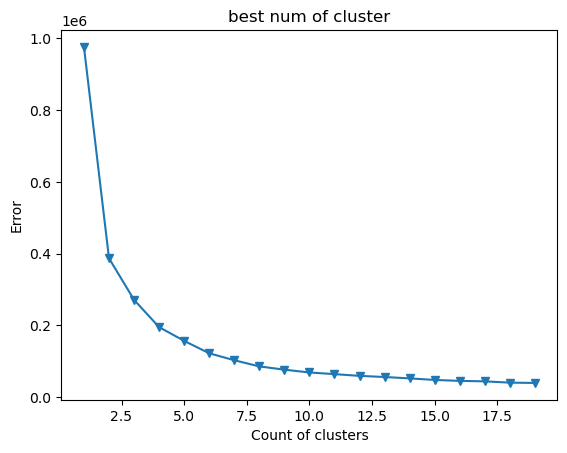

In [75]:
plt.plot(clusters,inertia,marker="v")
plt.title("best num of cluster")
plt.xlabel("Count of clusters")
plt.ylabel("Error")

In [76]:
km = KMeans(n_clusters = 5)
km.fit(df)
pred = km.predict(df)

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [77]:
df['kmeans'] = pred

In [78]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),km,kmeans
0,1,1,19,15,39,2,4
1,2,1,21,15,81,2,3
2,3,0,20,16,6,3,4
3,4,0,23,16,77,2,3
4,5,0,31,17,40,3,4
...,...,...,...,...,...,...,...
195,196,0,35,120,79,4,1
196,197,0,45,126,28,1,0
197,198,1,32,126,74,4,1
198,199,1,32,137,18,1,0


In [79]:
df['kmeans'].unique()

array([4, 3, 2, 1, 0])

In [63]:
df1 = df[df['kmeans']==0] 
df2 = df[df['kmeans']==1] 
df3 = df[df['kmeans']==2] 
df4 = df[df['kmeans']==3] 
df5 = df[df['kmeans']==4] 

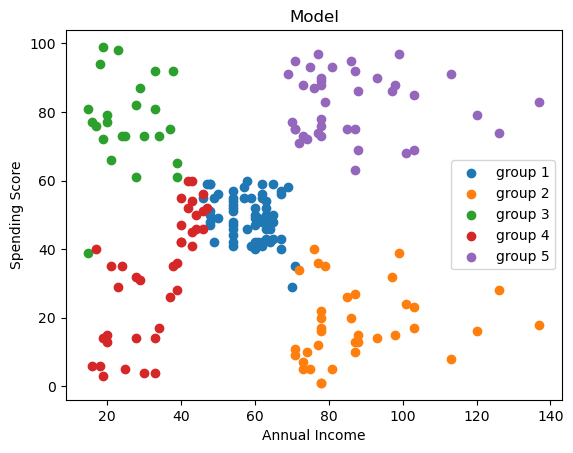

In [69]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'], label = 'group 1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'], label = 'group 2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'], label = 'group 3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'], label = 'group 4')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'], label = 'group 5')

plt.title('Model')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.legend()

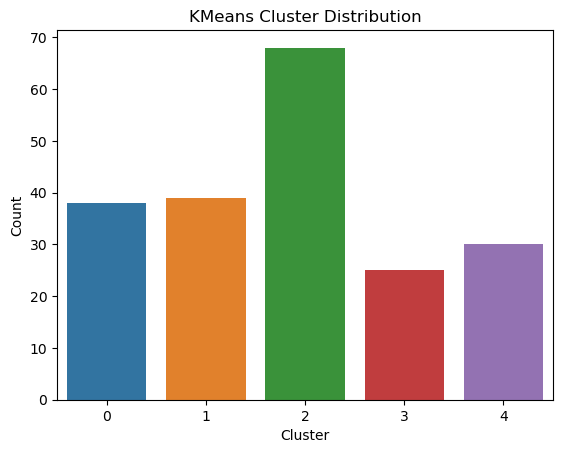

In [84]:
sns.countplot(x=df['kmeans'])

# Display the plot
plt.title('KMeans Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [88]:
df['kmeans'].value_counts()

kmeans
2    68
1    39
0    38
4    30
3    25
Name: count, dtype: int64

In [89]:
km = KMeans(n_clusters = 4)
km.fit(df)
pred = km.predict(df)

C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [90]:
df['kmeans2'] = pred

In [91]:
df['kmeans2'].value_counts()

kmeans2
1    66
2    59
0    39
3    36
Name: count, dtype: int64

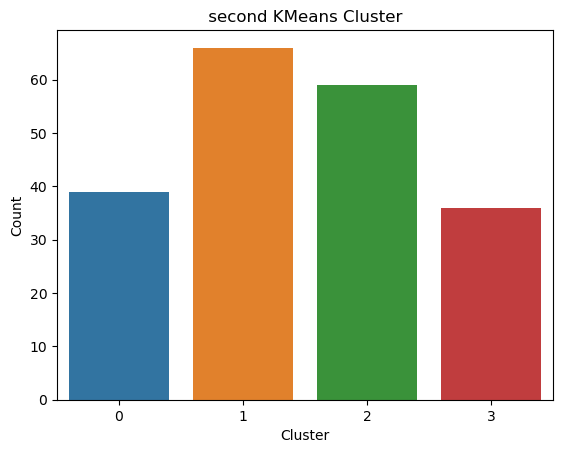

In [92]:
sns.countplot(x=df['kmeans2'])

# Display the plot
plt.title(' second KMeans Cluster ')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

C:\Users\ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

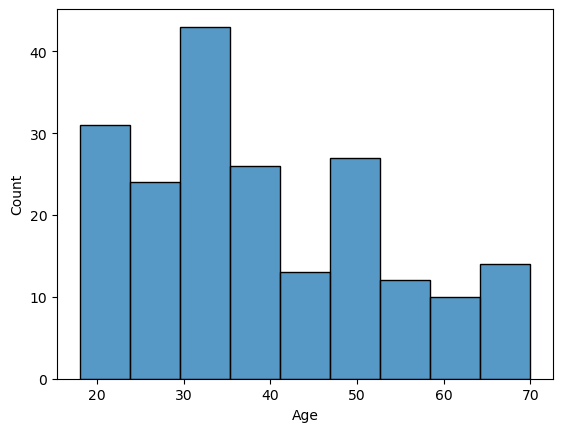

In [93]:
sns.histplot(df.Age)

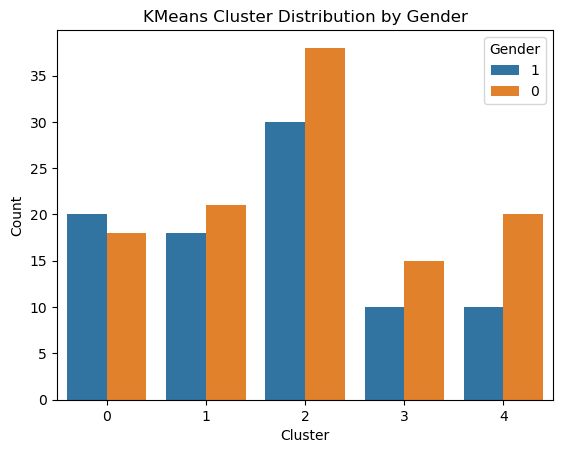

In [101]:
df['Gender'] = df['Gender'].astype(str)

sns.countplot(x='kmeans', hue='Gender', data=df)

plt.title('KMeans Cluster Distribution by Gender')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


<Axes: xlabel='Gender', ylabel='count'>

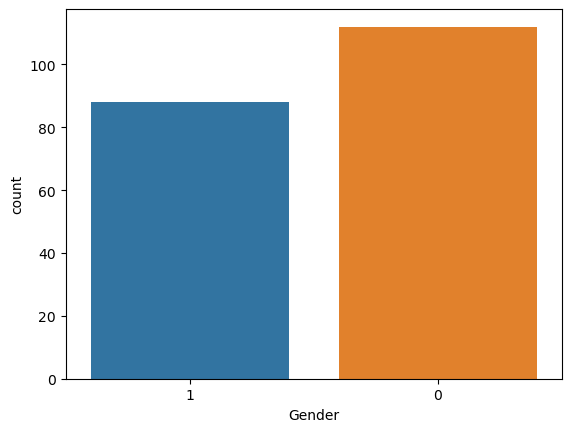

In [105]:
sns.countplot(data= df , x= 'Gender')